In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# Student dataset
df = pd.read_excel("students_marks.xlsx")

# Print first 5 rows of the dataframe
print(df.head())

   Roll No    Name  DBMS  Python  Data Science  OS_Linux  Statistics  \
0        1   Kiran    77      82            87        76          65   
1        2   Suman    76      87            92        54          72   
2        3  Vikram    87      90            88        60          93   
3        4     Raj    76      76            68        93          98   
4        5  Simran    95      61            87        62          75   

   Total Obtained  Total Marks  
0             387          500  
1             381          500  
2             418          500  
3             411          500  
4             380          500  


In [30]:
subjects = ["DBMS", "Python", "Data Science", "OS_Linux", "Statistics"]

# Total marks
df["Total_Marks"] = df[subjects].sum(axis=1)  

# Average marks
df["Average_Marks"] = df[subjects].mean(axis=1)

print(df[["Name", "Total_Marks", "Average_Marks"]].head())

     Name  Total_Marks  Average_Marks
0   Kiran          387           77.4
1   Suman          381           76.2
2  Vikram          418           83.6
3     Raj          411           82.2
4  Simran          380           76.0


In [31]:
# Topper 
topper = df.loc[df["Total_Marks"].idxmax()]
print("Topper details...")
print(topper) 


Topper details...
Roll No              102
Name              Joseph
DBMS                  89
Python                85
Data Science         100
OS_Linux              90
Statistics            76
Total Obtained       440
Total Marks          500
Total_Marks          440
Average_Marks       88.0
Name: 101, dtype: object


In [ ]:
# Function to find grade
def assign_grade(avg):
    if avg >= 90:
        return "A"
    elif avg >= 75:
        return "B"
    elif avg >= 60:
        return "C"
    elif avg >= 50:
        return "D"
    elif avg >= 45:
        return "E"
    else:
        return "F"

# Grading
df["Grade"] = df["Average_Marks"].apply(assign_grade)

print(df[["Name", "Average_Marks", "Grade"]].head())



     Name  Average_Marks Grade
0   Kiran           77.4     B
1   Suman           76.2     B
2  Vikram           83.6     B
3     Raj           82.2     B
4  Simran           76.0     B


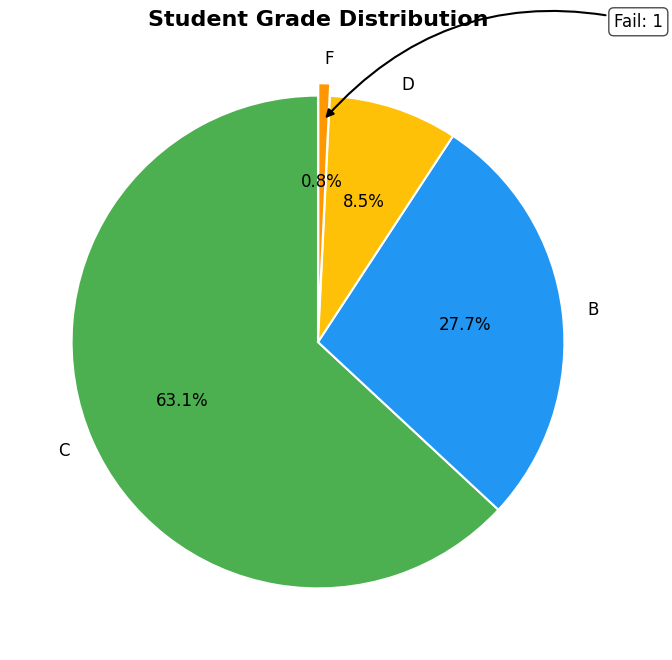

In [48]:
grade_counts = df["Grade"].value_counts()

# Pie Chart
colors = ['#4CAF50', '#2196F3', '#FFC107', '#FF9800', '#E91E63']
explode = [0.05 if val == grade_counts.min() else 0 for val in grade_counts] 

plt.figure(figsize=(8,8))

# Create donut
wedges, texts, autotexts = plt.pie(
    grade_counts,
    labels=grade_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor':'white', 'linewidth':1.5} 
)

# Style labels and percentages
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_color('black')

plt.title("Student Grade Distribution", fontsize=16, fontweight='bold')

# Annotate the 'F' wedge
f_index = list(grade_counts.index).index('F')
f_wedge = wedges[f_index]
angle = (f_wedge.theta2 + f_wedge.theta1) / 2
x = np.cos(np.deg2rad(angle))
y = np.sin(np.deg2rad(angle))

plt.annotate(
    f"Fail: {grade_counts['F']}",
    xy=(0.9*x, 0.9*y),
    xytext=(1.3*np.sign(x), 1.3*y),
    ha='center',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7),
    arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3,rad=0.3", color='black', lw=1.5)
)

plt.show()
